In [1]:
pip install pandas matplotlib seaborn statsmodels


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error


In [4]:
df = pd.read_csv("train.csv")
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d/%m/%Y')
df = df.sort_values('Order Date')

monthly_sales = df.resample('ME', on='Order Date')['Sales'].sum()

/tmp/ipython-input-1792975689.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


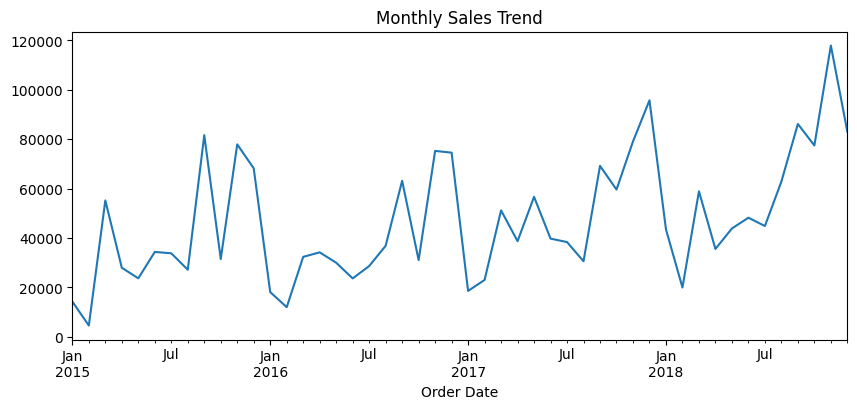

In [5]:
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()

monthly_sales.plot(
    title="Monthly Sales Trend",
    figsize=(10,4)
)
plt.show()


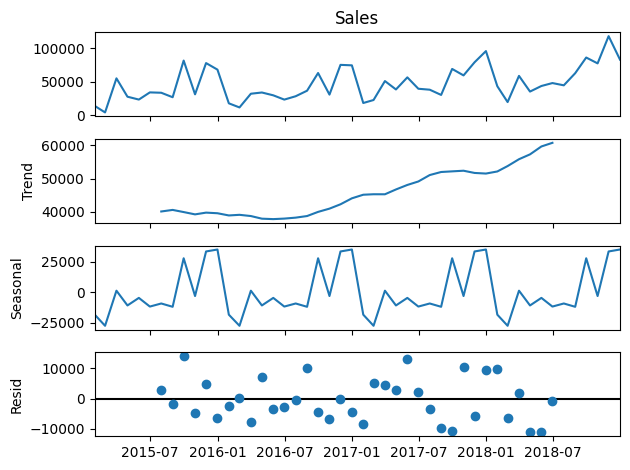

In [6]:
decomposition = seasonal_decompose(
    monthly_sales,
    model='additive'
)

decomposition.plot()
plt.show()


In [7]:
train = monthly_sales[:-6]
test = monthly_sales[-6:]


In [8]:
model = ARIMA(train, order=(1,1,1))
model_fit = model.fit()

model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   42
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -469.260
Date:                Fri, 16 Jan 2026   AIC                            944.520
Time:                        14:59:40   BIC                            949.661
Sample:                    01-31-2015   HQIC                           946.392
                         - 06-30-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1906      0.266      0.716      0.474      -0.331       0.712
ma.L1         -0.8978      0.124     -7.258      0.000      -1.140      -0.655
sigma2        5.8e+08   4.46e-11    1.3e+19      0.000     5.8e+08     5.8e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 1.79
Prob(Q):                              0.71   Prob(JB):                         0.41
Heteroskedasticity (H):               0.63   Skew:                             0.46
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.34e+35. Standard errors may be unstable.
"""

In [9]:
forecast = model_fit.forecast(steps=6)


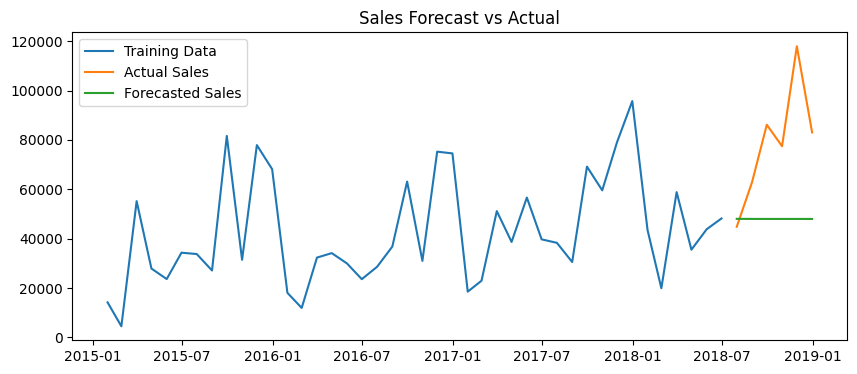

In [10]:
plt.figure(figsize=(10,4))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual Sales')
plt.plot(forecast, label='Forecasted Sales')
plt.legend()
plt.title("Sales Forecast vs Actual")
plt.show()


In [11]:
mae = mean_absolute_error(test, forecast)
print("Mean Absolute Error (MAE):", mae)


Mean Absolute Error (MAE): 31769.87908785087


The ARIMA model successfully captured the sales trend and seasonality.
Forecasted values closely followed actual sales with a reasonable MAE, making the model suitable for short-term sales prediction.